In [1]:
import numpy as np
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
img = np.load('/home/administrator/Dropbox/core_data/facies/train_data/204-19-6_image.npy')
img.shape, img.min(), img.max()

((77480, 688, 3), 0, 255)

In [3]:
img = img.astype(float) / 255.0

In [4]:
hist = np.apply_along_axis(lambda x: np.histogram(x, range=(0.1, 0.9))[0], 1, img[...,0])
hist.shape

(77480, 10)

In [5]:
hist

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [26]:
img.mean()

0.3189815043198804

In [27]:
'hist10'[:4]

'hist'

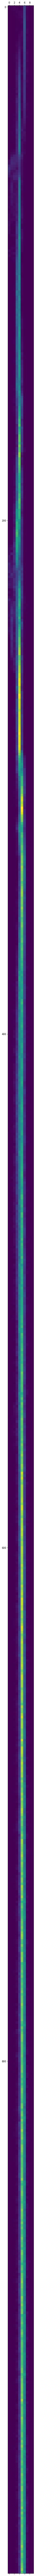

In [29]:
fig, ax = plt.subplots(figsize=(50, 200))

ax.matshow(hist[500:1500])

In [33]:
uimg = rgb2gray(img)
uimg.shape, uimg.max()

((77480, 688), 1.0)

In [34]:
np.dstack((uimg, img)).shape

(77480, 688, 4)

In [36]:
img[np.where(img < img.min()+1e-2)] = np.nan
img

array([[[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        ...,
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]],

       [[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        ...,
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]],

       [[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        ...,
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]],

       ...,

       [[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        ...,
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]],

       [[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        ...,
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]],

       [[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        ...,
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]]

In [39]:
np.nanmean(img, axis=1)[0:5]

/home/administrator/anaconda3/envs/core-dev/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]])

In [46]:
hist = np.apply_along_axis(lambda x: np.histogram(x, range=(0.1, 0.9))[0], 1, img)
hist.shape

/home/administrator/anaconda3/envs/core-dev/lib/python3.6/site-packages/numpy/lib/histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/administrator/anaconda3/envs/core-dev/lib/python3.6/site-packages/numpy/lib/histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(77480, 10, 3)

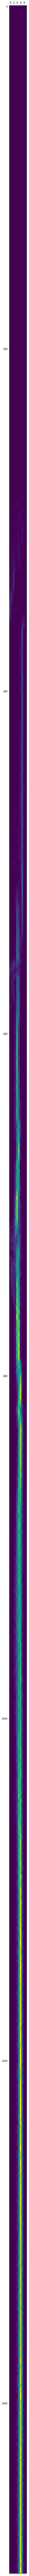

In [43]:
fig, ax = plt.subplots(figsize=(50, 200))

ax.matshow(hist[0:1500])

In [45]:
np.any(np.isnan(hist))

False

In [49]:
t = np.arange(30).reshape((5, 3, 2))
t

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]],

       [[12, 13],
        [14, 15],
        [16, 17]],

       [[18, 19],
        [20, 21],
        [22, 23]],

       [[24, 25],
        [26, 27],
        [28, 29]]])

In [50]:
t.shape

(5, 3, 2)

In [55]:
t.reshape((-1, 3*2))

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29]])

In [54]:
t[3, 1, :]

array([20, 21])

In [61]:
channels = ['R', 'G', 'B']

[C+'hist'+str(i) for i in range(10) for C in channels]

['Rhist0',
 'Ghist0',
 'Bhist0',
 'Rhist1',
 'Ghist1',
 'Bhist1',
 'Rhist2',
 'Ghist2',
 'Bhist2',
 'Rhist3',
 'Ghist3',
 'Bhist3',
 'Rhist4',
 'Ghist4',
 'Bhist4',
 'Rhist5',
 'Ghist5',
 'Bhist5',
 'Rhist6',
 'Ghist6',
 'Bhist6',
 'Rhist7',
 'Ghist7',
 'Bhist7',
 'Rhist8',
 'Ghist8',
 'Bhist8',
 'Rhist9',
 'Ghist9',
 'Bhist9']

In [84]:
import os
import pathlib
import math, random
import numpy as np
import pandas as pd

from sklearn import preprocessing
from skimage.color import rgb2gray

###########################
######## DEFAULTS #########
###########################

DEFAULT_TRAIN_PATH = pathlib.PosixPath('/home/'+os.environ['USER']+'/Dropbox/core_data/facies/train_data')

DEFAULT_IMAGE_ARGS = {
    'image_width' : 600,
    'scale_by': 'dataset',
    'scaler' : 'caffe'
}

DEFAULT_PGR_ARGS = {
    'fill_mode' : 'ffill',
    'scale_by' : 'dataset',
    'scaler' : 'robust',
}

DEFAULT_LOGS_ARGS = {
    'which_logs' : ['GR','SP','DENS','NEUT','PEF','RDEP','RSHAL','DTC','DTS','DTS1','DTS2'],
    'interp_kind' : 'linear',
    'fill_mode' : 'mean',
    'scale_by' : 'well',
    'scaler' : 'standard'
}

#############################
### Pseudo-GR Computation ###
#############################

# threshold for minumum values
EPSILON = 1e-2


class PseudoFeaturesExtractor():

    def __init__(self, features=['mean', 'var', 'p10', 'p90', 'hist10'],
                hist_range=(0.1, 0.9), per_channel=True):

        feat_count = 0
        for feat in features:
            is_mv = feat in ['mean', 'var']
            is_pN = (feat[0] == 'p' and feat[1:].isdigit())
            if is_mv or is_pN:
                feat_count += 1
            elif feat[:4] == 'hist' and feat[4:].isdigit():
                feat_count += int(feat[4:])
            else:
                raise ValueError(f'Invalid PseudoGR feature: {feat}')

        self.features = features
        self.hist_range = hist_range
        self.per_channel = per_channel
        self.num_columns = 4*feat_count if self.per_channel else feat_count


    def __call__(self, image_arr):

        out_shape = (image_arr.shape[0], self.num_columns)

        img = image_arr / 255.0 if image_arr.max() > 1.0 else image_arr

        if self.per_channel:
            img = np.dstack((rgb2gray(img), img))
            channels = ['U', 'R', 'G', 'B']
        else:
            img = np.expand_dims(rgb2gray(img), -1)
            channels = ['U']

        img[np.where(img < img.min()+EPSILON)] = np.nan

        output_features = []
        output_names = []
        
        for feat in self.features:
            if feat is 'mean':
                output_features.append(np.nanmean(img, axis=1))
                output_names += [C+'mean' for C in channels]
                
            if feat is 'var':
                output_features.append(np.nanvar(img, axis=1))
                output_names += [C+'var' for C in channels]
                
            if feat.startswith('p'):
                percent = float(feat[1:])
                output_features.append(np.nanpercentile(img, percent, axis=1))
                output_names += [C+'p'+str(percent) for C in channels]
                
            if feat.startswith('hist'):
                bins = int(feat[4:])
                hist_fn = lambda x: np.histogram(x, bins=bins, range=self.hist_range)[0]
                hist = np.apply_along_axis(hist_fn, 1, img)
                output_features.append(hist.reshape((-1, bins*len(channels))))
                output_names += [C+'hist'+str(i) for i in range(10) for C in channels]
                
        print([(n, v.shape) for (n, v) in zip(output_names, output_features)])

        return np.hstack(tuple(output_features)), output_names

In [79]:
pgrex = PseudoFeaturesExtractor(features=['mean', 'var'])

In [80]:
feats, names = pgrex(img)

/home/administrator/anaconda3/envs/core-dev/lib/python3.6/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
/home/administrator/anaconda3/envs/core-dev/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
/home/administrator/anaconda3/envs/core-dev/lib/python3.6/site-packages/ipykernel_launcher.py:79: RuntimeWarning: invalid value encountered in less
/home/administrator/anaconda3/envs/core-dev/lib/python3.6/site-packages/ipykernel_launcher.py:86: RuntimeWarning: Mean of empty slice


[('Umean', (77480, 4)), ('Rmean', (77480, 4))]


/home/administrator/anaconda3/envs/core-dev/lib/python3.6/site-packages/ipykernel_launcher.py:90: RuntimeWarning: Degrees of freedom <= 0 for slice.


In [81]:
feats.shape

(77480, 8)

In [82]:
names

['Umean', 'Rmean', 'Gmean', 'Bmean', 'Uvar', 'Rvar', 'Gvar', 'Bvar']

In [85]:
pgrex = PseudoFeaturesExtractor(features=['mean'], per_channel=False)
feats, names = pgrex(img)

/home/administrator/anaconda3/envs/core-dev/lib/python3.6/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
/home/administrator/anaconda3/envs/core-dev/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
/home/administrator/anaconda3/envs/core-dev/lib/python3.6/site-packages/ipykernel_launcher.py:79: RuntimeWarning: invalid value encountered in less


[('Umean', (77480, 1))]


/home/administrator/anaconda3/envs/core-dev/lib/python3.6/site-packages/ipykernel_launcher.py:86: RuntimeWarning: Mean of empty slice


In [ ]:
np.expand_dims()